## Working with QTM in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/10_qtm.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/10_qtm.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/10_qtm.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/10_qtm.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2qtm

In [2]:
from vgrid.conversion.latlon2dggs import latlon2qtm

lat = 10.775276
lon = 106.706797
res = 14
qtm_id = latlon2qtm(lat, lon, res)
qtm_id

'42012323131211'

### QTM to Polygon

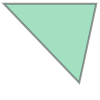

In [3]:
from vgrid.conversion.dggs2geo.qtm2geo import qtm2geo

qtm_geo = qtm2geo(qtm_id)
qtm_geo

### QTM to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.qtm2geo import qtm2geojson

qtm_geojson = qtm2geojson(qtm_id)
# qtm_geojson

### Vector to QTM

Processing features: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


<Axes: >

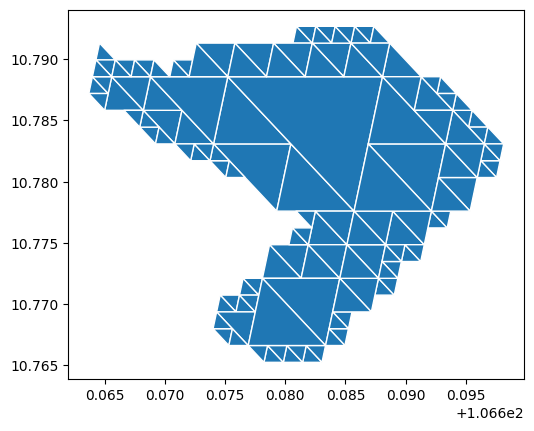

In [21]:
from vgrid.conversion.vector2dggs.vector2qtm import vector2qtm

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
vector_to_qtm = vector2qtm(
    file_path,
    resolution=17,
    compact=True,
    topology=False,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output
vector_to_qtm.plot(edgecolor="white")

### QTM Compact

<Axes: >

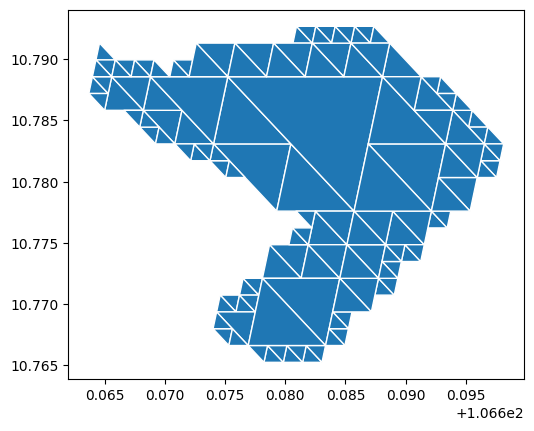

In [6]:
from vgrid.conversion.dggscompact import qtmcompact

qtm_compacted = qtmcompact(vector_to_qtm, qtm_id="qtm", output_format="gpd")
qtm_compacted.plot(edgecolor="white")

### QTM Expand

<Axes: >

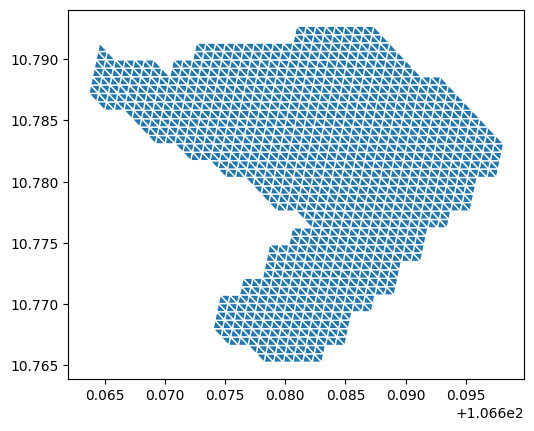

In [7]:
from vgrid.conversion.dggscompact import qtmexpand

qtm_expanded = qtmexpand(
    vector_to_qtm, resolution=18, qtm_id="qtm", output_format="gpd"
)
qtm_expanded.plot(edgecolor="white")

### QTM Binning

Generating QTM DGGS: 100%|██████████| 16/16 [00:00<00:00, 65.29it/s]


<Axes: >

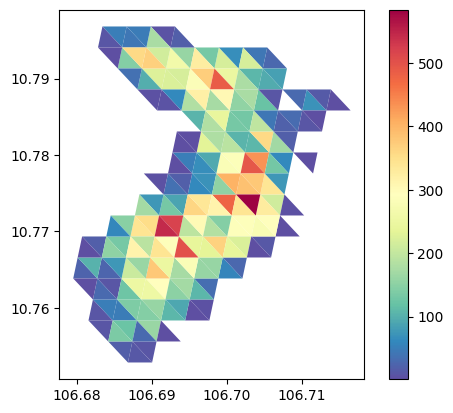

In [8]:
from vgrid.binning.qtmbin import qtmbin

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
qtm_bin = qtmbin(
    file_path,
    resolution=16,
    stats=stats,
    # numeric_field="confidence",
    # category="category",
    output_format="gpd",
)
qtm_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to QTM

#### Download and open raster

In [9]:
# %pip install folium

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


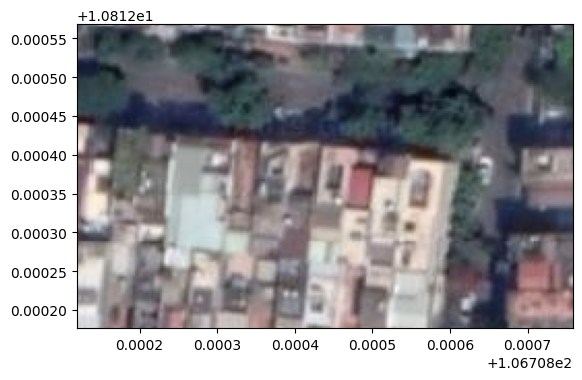

<Axes: >

In [10]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to QTM

In [11]:
from vgrid.conversion.raster2dggs.raster2qtm import raster2qtm

raster_to_qtm = raster2qtm(raster_file, resolution=23, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

qtm_layer = folium.GeoJson(
    raster_to_qtm,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["qtm", "band_1", "band_2", "band_3"],
        aliases=["QTM ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(qtm_layer.get_bounds())

# Display the map
m

Converting raster to QTM: 100%|██████████| 998/998 [00:01<00:00, 982.06 cells/s] 


### QTM Generator

Generating QTM DGGS: 100%|██████████| 3/3 [00:00<00:00, 27.52it/s]


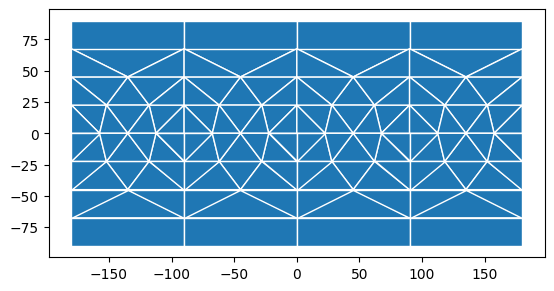

In [12]:
from vgrid.generator.qtmgrid import qtmgrid

qtm_grid = qtmgrid(resolution=3, output_format="gpd")
# qtm_grid = qtmgrid(resolution=18,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
qtm_grid.plot(edgecolor="white")
qtm_grid.to_file("qtm.geojson")

### QTM Inspect

In [13]:
from vgrid.stats.qtmstats import qtminspect

resolution = 6
qtm_inspect = qtminspect(resolution)
qtm_inspect.head()

Generating QTM DGGS: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]


qtm  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0   1           6        45.0      -135.0  1.000756e+07  6.375820e+13   
1   2           6        45.0       -45.0  1.000756e+07  6.375820e+13   
2   3           6        45.0        45.0  1.000756e+07  6.375820e+13   
3   4           6        45.0       135.0  1.000756e+07  6.375820e+13   
4   5           6       -45.0      -135.0  1.000756e+07  6.375820e+13   

   cell_perimeter                                           geometry  crossed  \
0    3.002269e+07  POLYGON ((-180 0, -90 0, -90 90, -180 90, -180...    False   
1    3.002269e+07        POLYGON ((-90 0, 0 0, 0 90, -90 90, -90 0))    False   
2    3.002269e+07            POLYGON ((0 0, 90 0, 90 90, 0 90, 0 0))    False   
3    3.002269e+07       POLYGON ((90 0, 180 0, 180 90, 90 90, 90 0))    False   
4    3.002269e+07  POLYGON ((-180 -90, -90 -90, -90 0, -180 0, -1...    False   

   norm_area       ipq       zsc  cvh  
0      512.5  0.888888  0.882057  1.0  
1      512.5  0.888888  0.882057  1.0  
2      512.5  0.888888  0.882057  1.0  
3      512.5  0.888888  0.882057  1.0  
4      512.5  0.888888  0.882057  1.0

### QTM Normalized Area Histogram

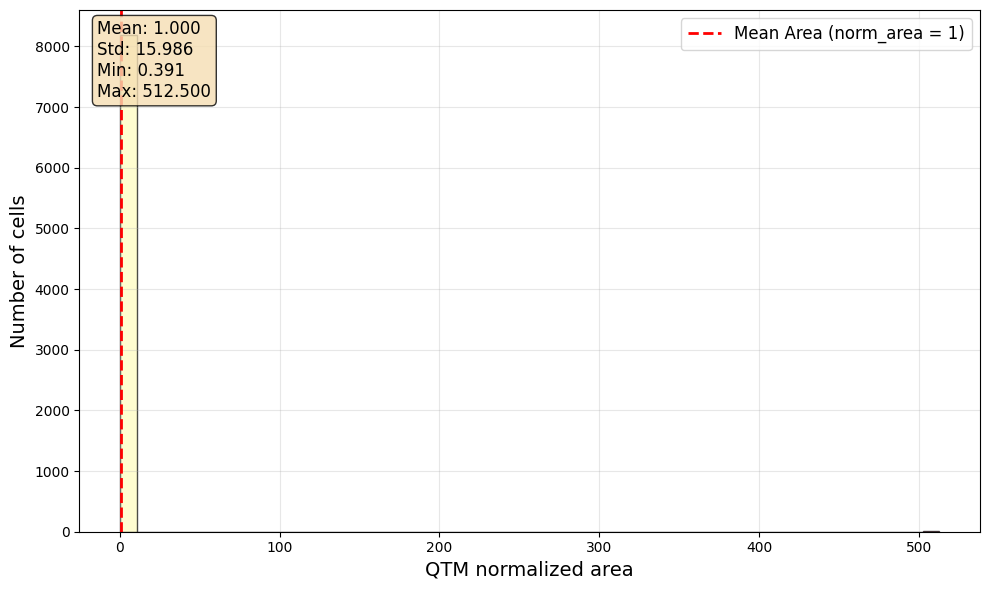

In [14]:
from vgrid.stats.qtmstats import qtm_norm_area_hist

qtm_norm_area_hist(qtm_inspect)

### Distribution of QTM Area Distortions

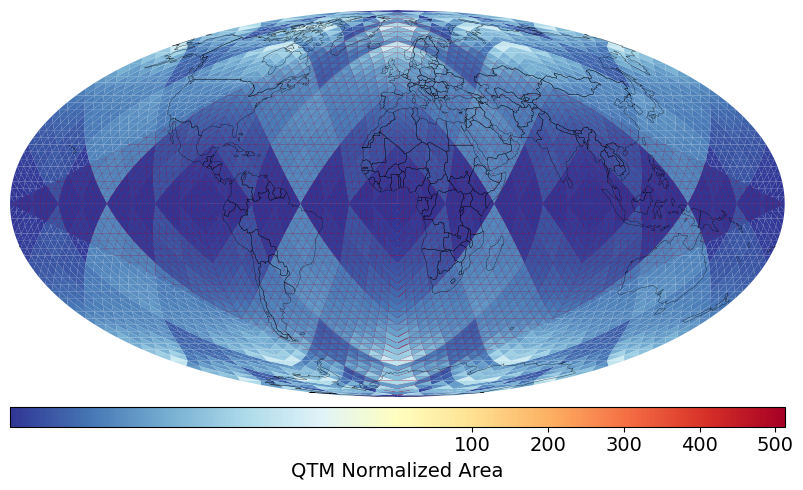

In [15]:
from vgrid.stats.qtmstats import qtm_norm_area

qtm_norm_area(qtm_inspect)

### QTM IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

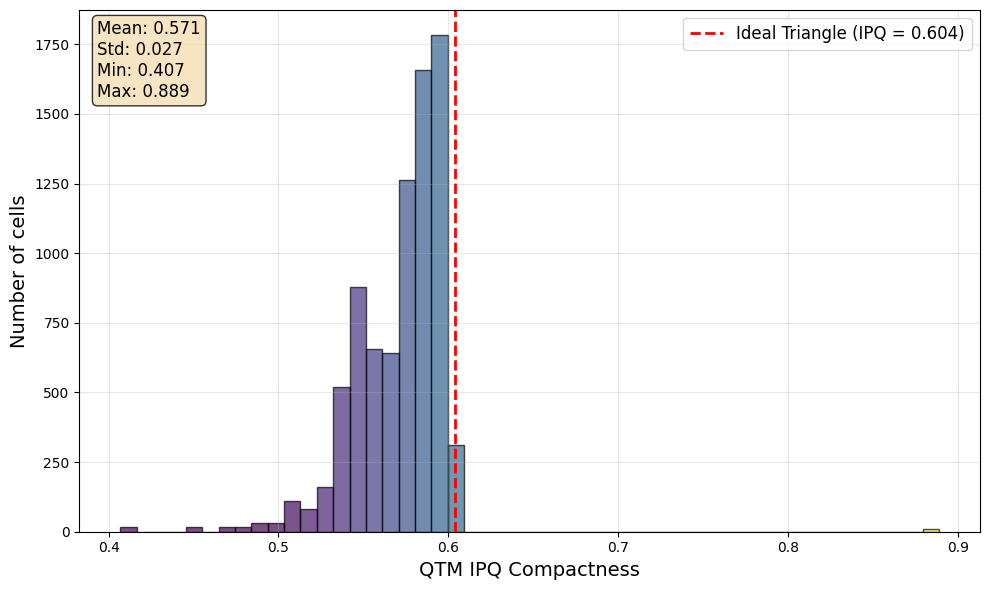

In [16]:
from vgrid.stats.qtmstats import qtm_compactness_ipq_hist

qtm_compactness_ipq_hist(qtm_inspect)

### Distribution of QTM IPQ Compactness

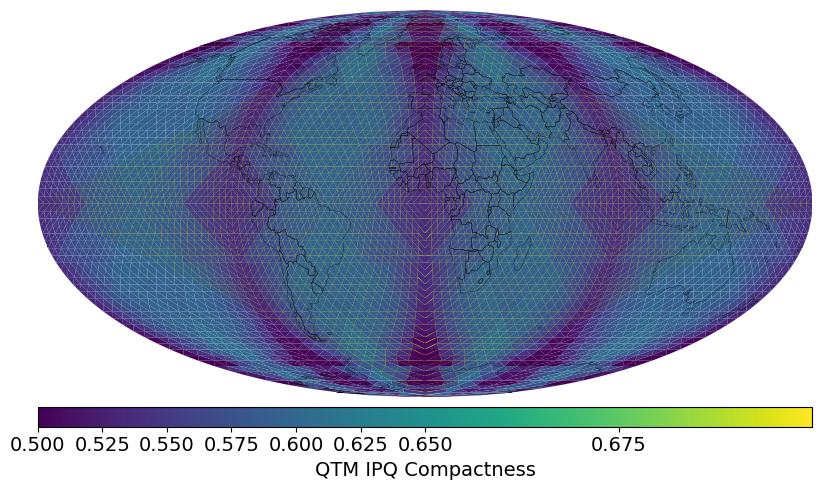

In [17]:
from vgrid.stats.qtmstats import qtm_compactness_ipq

qtm_compactness_ipq(qtm_inspect)

### QTM Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

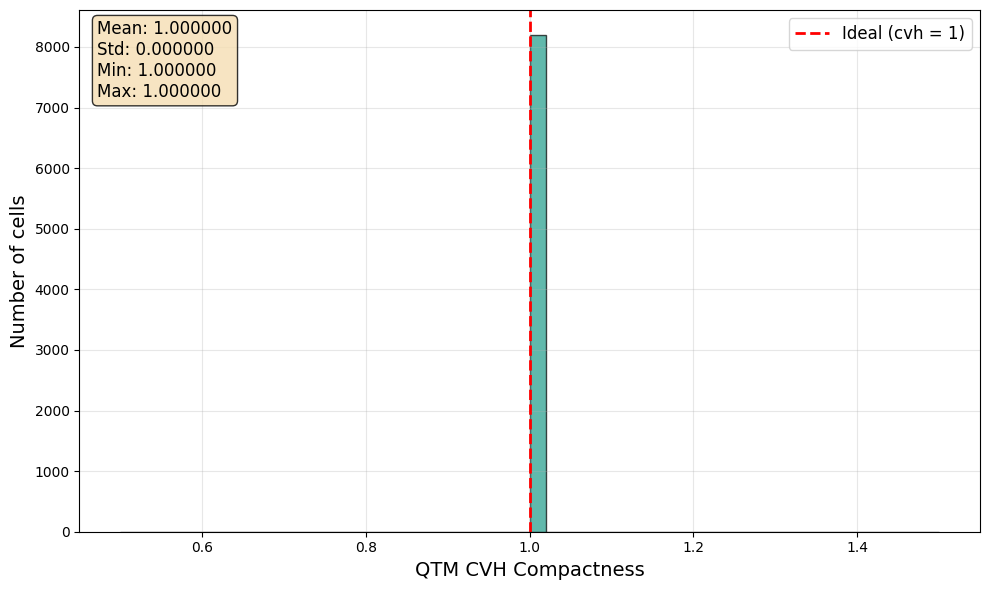

In [18]:
from vgrid.stats.qtmstats import qtm_compactness_cvh_hist

qtm_compactness_cvh_hist(qtm_inspect)

### Distribution of QTM Convex hull Compactness

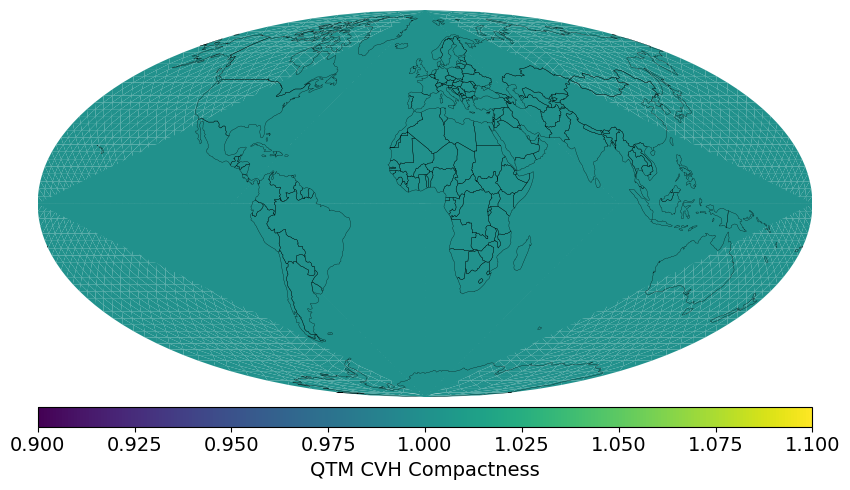

In [19]:
from vgrid.stats.qtmstats import qtm_compactness_cvh

qtm_compactness_cvh(qtm_inspect)

### QTM Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [20]:
from vgrid.stats import qtmstats

qtmstats("km")

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2  \
0            1                8     12134.383462       6.375820e+07   
1            2               32      6067.191731       1.593955e+07   
2            3              128      3033.595866       3.984888e+06   
3            4              512      1516.797933       9.962219e+05   
4            5             2048       758.398966       2.490555e+05   
5            6             8192       379.199483       6.226387e+04   
6            7            32768       189.599742       1.556597e+04   
7            8           131072        94.799871       3.891492e+03   
8            9           524288        47.399935       9.728730e+02   
9           10          2097152        23.699968       2.432182e+02   
10          11          8388608        11.849984       6.080456e+01   
11          12         33554432         5.924992       1.520114e+01   
12          13        134217728         2.962496       3.800285e+00   
13          14        536870912         1.481248       9.500713e-01   
14          15       2147483648         0.740624       2.375178e-01   
15          16       8589934592         0.370312       5.937945e-02   
16          17      34359738368         0.185156       1.484486e-02   
17          18     137438953472         0.092578       3.711216e-03   
18          19     549755813888         0.046289       9.278040e-04   
19          20    2199023255552         0.023144       2.319510e-04   
20          21    8796093022208         0.011572       5.798775e-05   
21          22   35184372088832         0.005786       1.449694e-05   
22          23  140737488355328         0.002893       3.624234e-06   
23          24  562949953421312         0.001447       9.060586e-07   

         cls_km  
0   9209.090165  
1   4528.782056  
2   2255.434481  
3   1126.612534  
4    563.168635  
5    281.567127  
6    140.781415  
7     70.390439  
8     35.195186  
9     17.597589  
10     8.798794  
11     4.399397  
12     2.199698  
13     1.099849  
14     0.549925  
15     0.274962  
16     0.137481  
17     0.068741  
18     0.034370  
19     0.017185  
20     0.008593  
21     0.004296  
22     0.002148  
23     0.001074